# Survey Analysis

The following code is used to analyze and visualize data collected from an in-person survey. 

In [44]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# load the data ignoring the first row and using the second row for the column names
# note - full text of questions are available in the first skipped row

data = pd.read_csv('./survey_results_text.csv', skiprows=1, header=0)

# remove survey test row
data = data[data['participant_ID']!='SURVEY TEST']

## Plotting Cross Tabulations

In [46]:
# Create age categories from age data

age = data['participant_age']
age_cutoffs = [0, 30, 40, 50, 60, 100]
age_categories = ['30 and under','31-40', '41-50', '51-60', 'over 60']
data['age_categories'] = pd.cut(age, bins=age_cutoffs, labels=age_categories)

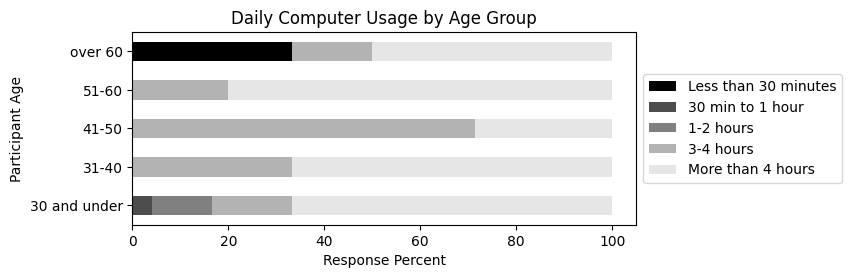

In [47]:
# Create summary data of daily computer usage by age group

summary = pd.crosstab(data['age_categories'], data['computer_time'], normalize='index') * 100
summary = summary[['Less than 30 minutes', '30 min to 1 hour', '1-2 hours', '3-4 hours', 'More than 4 hours']]

# Create a stacked bar graph of the results

from matplotlib.colors import ListedColormap
cmap = ListedColormap([(0, 0, 0), (.3, .3, .3), (.5, .5, .5), (.7, .7, .7), (.9, .9, .9)])
summary.plot(
    kind='barh',
    colormap=cmap,
    stacked=True,
    figsize=(6.5, 2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.title('Daily Computer Usage by Age Group')
plt.xlabel('Response Percent')
plt.ylabel('Participant Age')
plt.savefig('filename.png', dpi=300)

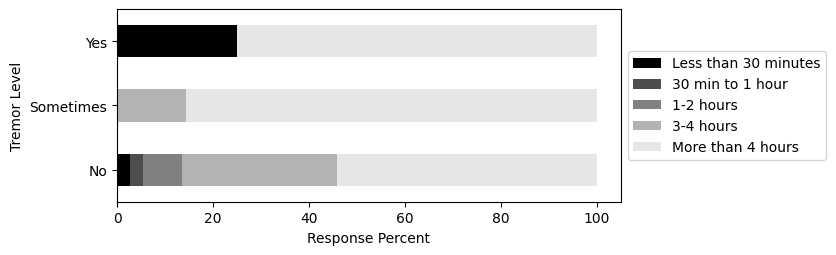

In [48]:
summary = pd.crosstab(data['tremor_level'], data['computer_time'], normalize='index') * 100
summary = summary[['Less than 30 minutes', '30 min to 1 hour', '1-2 hours', '3-4 hours', 'More than 4 hours']]

# Create a stacked bar graph of the results
summary.plot(
    kind='barh',
    colormap=cmap,
    stacked=True,
    figsize=(6.5,2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.xlabel('Response Percent')
plt.ylabel('Tremor Level')
plt.savefig('filename.png', dpi=300)

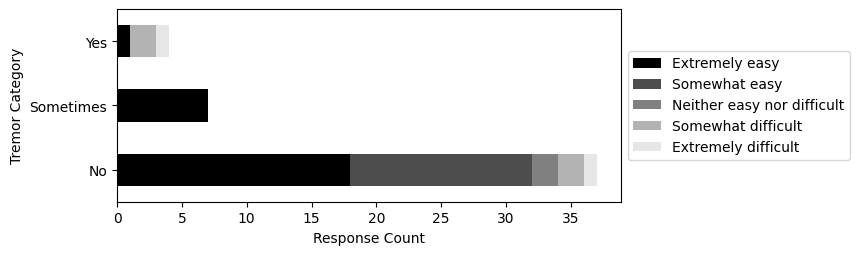

In [49]:
summary = pd.crosstab(data['tremor_level'], data['mouse_challenge_drag'])
summary = summary[['Extremely easy','Somewhat easy', 'Neither easy nor difficult', 'Somewhat difficult', 'Extremely difficult']]


# Create a stacked bar graph of the results
summary.plot(
    kind='barh',
    colormap=cmap,
    stacked=True,
    legend=True,
    figsize=(6.5,2.5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.xlabel('Response Count')
plt.ylabel('Tremor Category')
plt.savefig('filename.png', dpi=300)

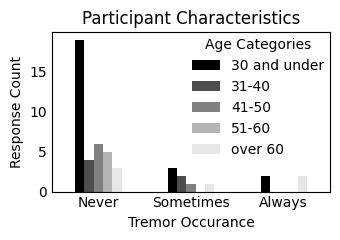

In [69]:
summary = pd.crosstab(data['tremor_level'], data['age_categories'])

# Create a stacked bar graph of the results
ax = summary.plot(
    kind='bar',
    colormap=cmap,
    stacked=False,
    figsize=(3.5,2.5))

# Set the tick labels and legend
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels(['Never', 'Sometimes', 'Always'])

ax.legend(
    title='Age Categories',
    loc='upper right',
    borderaxespad=0,
    frameon=False
)

plt.xlabel('Tremor Occurance')
plt.ylabel('Response Count')
plt.title('Participant Characteristics')

plt.tight_layout()
plt.savefig('participant characteristics.png', dpi=300, bbox_inches='tight')

## Quantified Plots

In [75]:
data = pd.read_csv('./survey_results_numerical.csv', skiprows=1, header=0)
data = data[data['participant_ID']!='SURVEY TEST']

challenge_mean = pd.pivot_table(data,
                             values=['mouse_challenge_click', 'mouse_challenge_drag', 'mouse_challenge_move', 'mouse_challenge_scroll'],
                             columns='tremor_level',
                             aggfunc='mean')

challenge_std = pd.pivot_table(data,
                             values=['mouse_challenge_click', 'mouse_challenge_drag', 'mouse_challenge_move', 'mouse_challenge_scroll'],
                             columns='tremor_level',
                             aggfunc='mean')


In [76]:
challenge_mean


tremor_level,1,2,3
mouse_challenge_click,3.00,1.000000,1.324324
mouse_challenge_drag,3.50,1.000000,1.756757
mouse_challenge_move,4.25,1.142857,1.513514
mouse_challenge_scroll,3.00,1.142857,1.459459


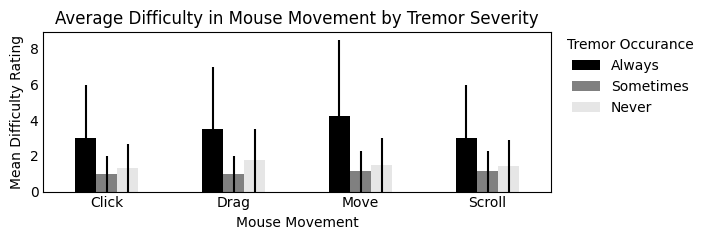

In [88]:
# Create a stacked bar graph of the results
ax = challenge_mean.plot(
    kind='bar',
    yerr=challenge_std,
    colormap=cmap,
    stacked=False,
    legend=True,
    figsize=(7.2,2.5))


# Set the tick labels and legend
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels(['Click', 'Drag', 'Move', 'Scroll'])
ax.legend(
    ['Always', 'Sometimes', 'Never'],
    title='Tremor Occurance',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),  # x=1.02 (a bit outside), y=1 (top-aligned)
    borderaxespad=0,
    frameon=False
)
# add labels and save figure
plt.title('Average Difficulty in Mouse Movement by Tremor Severity')
plt.xlabel('Mouse Movement')
plt.ylabel('Mean Difficulty Rating')
plt.tight_layout()
plt.savefig('mouse movement difficulty figure.png', dpi=300, bbox_inches='tight')

### Correlation Matrix and Heat Map

In [78]:
rows = ['mouse_fatigue_hand', 'mouse_fatigue_wrist', 'mouse_fatigue_arm']
cols = ['mouse_challenge_click', 'mouse_challenge_drag', 'mouse_challenge_move', 'mouse_challenge_scroll']

# Compute correlation matrix
cor_matrix = data[rows+cols].corr(method='pearson')
cor_slice = cor_matrix.loc[rows, cols]
cor_slice

,mouse_challenge_click,mouse_challenge_drag,mouse_challenge_move,mouse_challenge_scroll
mouse_fatigue_hand,-0.098662,-0.283477,-0.190195,-0.294086
mouse_fatigue_wrist,-0.105708,-0.284074,-0.184624,-0.155947
mouse_fatigue_arm,-0.149521,-0.363560,-0.133517,-0.184434


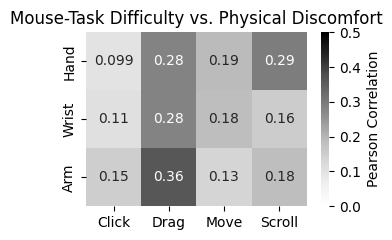

In [87]:
import seaborn as sns

cor_slice.columns = ['Click', 'Drag', 'Move', 'Scroll']
cor_slice.index = ['Hand', 'Wrist', 'Arm']

plt.figure(figsize=(3.5,2.5))

sns.heatmap(abs(cor_slice), annot=True, cmap='Greys', vmin=0, vmax=0.5,
    cbar_kws={'label': 'Pearson Correlation'})


# add labels and save figure
plt.title('Mouse-Task Difficulty vs. Physical Discomfort')
plt.tight_layout()
plt.savefig('mouse task discomfort figure.png', dpi=300, bbox_inches='tight')